In [ ]:
Group_member_Names = "Rabia Ejaz, Jason Ewer, Brendan Quinlan, Stephanie Siu"

In [ ]:
#imports
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score
from scipy.sparse import hstack,csr_matrix
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Input
from sklearn import preprocessing
from tensorflow.keras.models import Model
import scipy.sparse as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import learning_curve,cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
import xgboost as xgb

In [ ]:
#Testing out getting the dataset imported locally
#df_local = pd.read_csv('/content/fake_job_postings.csv')
#df_local

In [ ]:
#If we want to get it from a URL, tried putting it in my google drive and trying to open from that URL
#shared URL from my google drive
url='https://drive.google.com/file/d/1HrDyNDOnCwk1yQj4l4FrPqu6fM0x9AEZ/view?usp=sharing'
#small code to get the download URL from the google drive link so we can directly read the csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_url = pd.read_csv(path)
df_url

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
#JE - Starting EDA
#getting desciptive attributes
df_url.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df_url.shape


(17880, 18)

In [ ]:
df_url.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#JE - checking if there are any null values
df_url.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

JE - Question for the group - how do we want to address the entries that have null values? I have removed them below but we could use a different method if group thinks that's better.

BQ - thoughts on missing values: <br>
- Deleting rows should generally be our last resort <br>
- For categorical data, impute missing values with the mode or a placeholder value (e.g., Unknown) <br>
- For numeric data such as salary_range use the mean, median, or a regression model to predict the missing values. <br>
- Columns that have a large number of missing values might need to be dropped some of these columns, if they are not crucial for our analysis.

In [ ]:
df_url.dropna(inplace=True)
df_url.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
# alternative method to dealing with Nan
# mode for categorical columns
for column in ['location', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']:
    df_url[column].fillna(df_url[column].mode()[0], inplace=True)

# Imputing numeric columns with the median
df_url['salary_range'].fillna(df_url['salary_range'].median(), inplace=True)

# Dropping columns with high percentage of missing values
df_url.drop(columns=['department', 'salary_range', 'benefits'], inplace=True)

In [ ]:
df_url.shape

(774, 18)

In [ ]:
#JE - checking balance of dataset
#Using Xuan's function
def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced

fraudulent
0    702
1     72
Name: count, dtype: int64

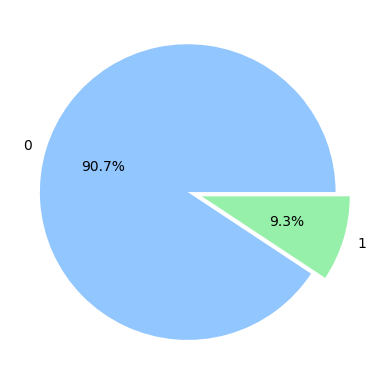

In [ ]:
check_data_balance(df_url["fraudulent"])

In [ ]:
#so dataset seems unbalanced. We can fix by oversampling fraudulent values.
df_url['fraudulent'].value_counts()


fraudulent
0    702
1     72
Name: count, dtype: int64

In [ ]:
fraudulent_df=df_url[df_url['fraudulent']==1]
fraudulent_df.shape

(72, 18)

In [ ]:
non_fraudulent_df=df_url[df_url['fraudulent']==0]
non_fradulent_df.shape

NameError: name 'non_fradulent_df' is not defined

In [ ]:
#JE - oversampling fraud values
fraudulent_df = fraudulent_df.sample(702, replace=True)
fraudulent_df.shape


(702, 18)

In [ ]:
df_url = pd.concat([non_fraudulent_df,fraudulent_df],ignore_index=True)
df_url
df_url.shape

(1404, 18)

In [ ]:
df_url.reset_index()
df_url

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
1,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
2,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
3,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0
4,135,Senior Business Development Manager,"GB, , Manchester",Sales and Business Development,70000-90000,MarketInvoice is one of the most high-profile ...,BACKGROUNDA senior sales and account managemen...,5-10 years sales experience in B2B solution sa...,Based in our Manchester officeCompetitive basi...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Financial Services,Sales,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,741,Health + Safety Professional,"US, CA, Bakersfield",HSE (Health Safety Environmental),80000-120000,...,Health &amp; Safety Professional | Bakersfield...,Duties and Responsibilities:Provides safety po...,What is offered:Competitive compensation packa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,1
1400,6691,Market Operations Manager,"US, TX, AUSTIN",HEADQUATERS,65000-85000,The Accion story began more than 100 years ag...,"ExemptSHIFT WORKEDMonday-Sundays, Days, Nights...",OTHER REQUIREMENTS (LICENSES/CERTIFICATIONS)Pr...,ALL BENEFITS,0,1,1,Full-time,Mid-Senior level,Some College Coursework Completed,Management Consulting,Finance,1
1401,1205,Health + Environmental Professional,"US, CA, Bakersfield",Oil & Energy,60000-90000,Macpherson Oil and Refined Resources have part...,Qualified candidates are encouraged to apply d...,"QualificationsMinimum Education, Knowledge &am...",What is offered:Competitive compensation packa...,0,1,1,Full-time,Entry level,Bachelor's Degree,Oil & Energy,Other,1
1402,3942,Customer Service Representative,"US, CA, Los Angeles",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1


In [ ]:
#JE - check if there are any duplicated job ids
duplicate_jobids = df_url[df_url.duplicated('job_id')]
print(f"There are {len(duplicate_jobids)} duplicate job ids in the dataset")

There are 630 duplicate job ids in the dataset


In [ ]:
#Differentiate categorical data and numerical data
df_numerical = df_url[['job_id','telecommuting','has_company_logo','has_questions','fraudulent']]
df_categorical = df_url[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function','salary_range']]

In [ ]:
#JE - checking that numerical and categorical were split up correctly

In [ ]:
df_numerical
df_numerical.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,7921.003561,0.148860,0.966524,0.658832,0.500000
std,4892.664427,0.356078,0.179939,0.474271,0.500178
min,7.000000,0.000000,0.000000,0.000000,0.000000
25%,4267.000000,0.000000,1.000000,0.000000,0.000000
50%,7052.500000,0.000000,1.000000,1.000000,0.500000
75%,11673.000000,0.000000,1.000000,1.000000,1.000000
max,17866.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_numerical

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
0,7,0,1,1,0
1,16,0,1,1,0
2,24,0,1,0,0
3,103,1,1,0,0
4,135,0,1,0,0
...,...,...,...,...,...
1399,741,0,1,1,1
1400,6691,0,1,1,1
1401,1205,0,1,1,1
1402,3942,1,1,0,1


In [ ]:
df_categorical
df_categorical.describe()

,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,salary_range
count,1404,1404,1404,1404,1404,1404,1404,1404,1404,1404
unique,615,217,198,641,5,7,10,68,36,300
top,Customer Service Representative,"US, TX, AUSTIN",The Accion story began more than 100 years ag...,Home Computer with Internet AccessBasic Comput...,Full-time,Entry level,High School or equivalent,Oil & Energy,Customer Service,30000-50000
freq,139,118,140,96,1290,561,691,192,392,108


<Axes: >

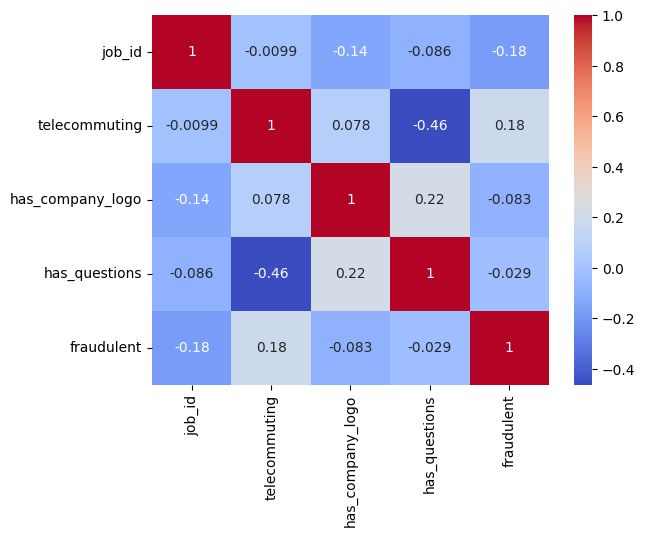

In [ ]:
#JE - heatmap for numerical columns
sns.heatmap(df_numerical.corr(), cmap='coolwarm', annot=True)

JE - telecommuting and has questions are the features with the lighter colors and therefore weaker correlations. we can drop if we want

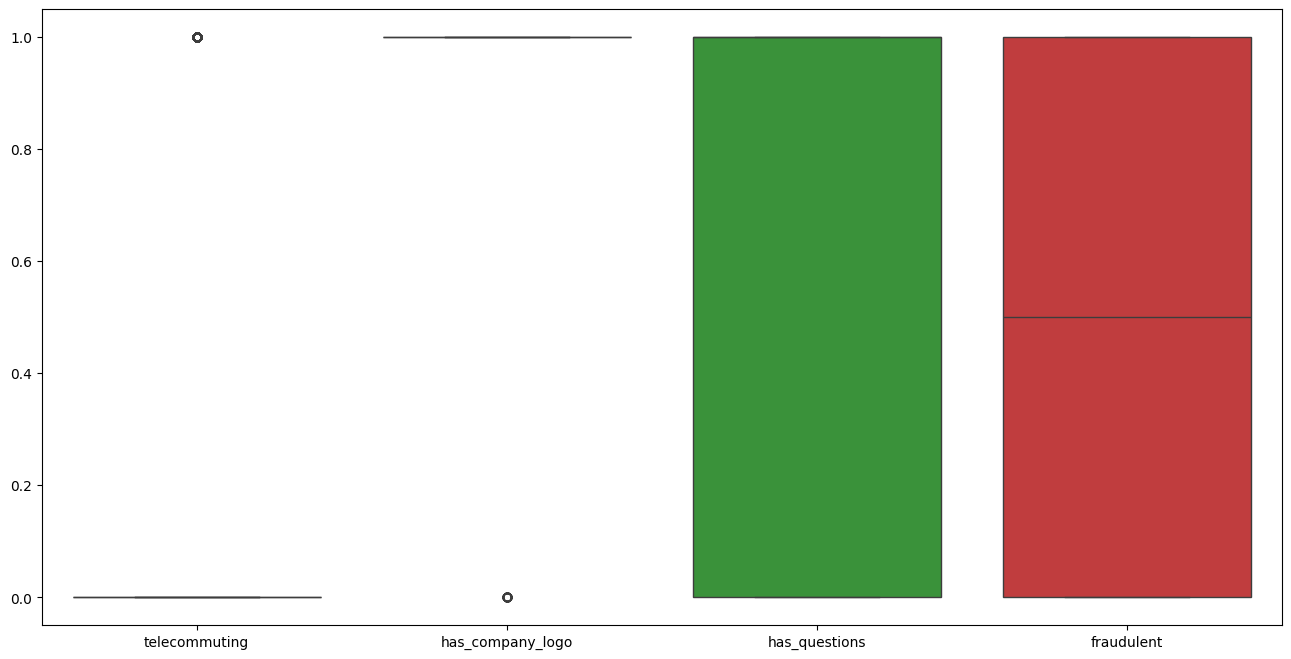

In [ ]:
#JE - Checking for outliers in numerical data via box plot
plt.figure(figsize=[16,8])
sns.boxplot(data = df_numerical.drop(columns=['job_id']))
plt.show()

In [ ]:
#JE - columns  company logo, telecommuting have outliers

In [ ]:
#JE defining 2 thresholds for outliers and using that to remove them
out_threshold_1 = 0.9
out_threshold_2 = 0.1


In [ ]:
df_url['has_company_logo'] = df_url['has_company_logo'].where(df_url['has_company_logo'] > out_threshold_2)
df_url['has_company_logo']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1399    1.0
1400    1.0
1401    1.0
1402    1.0
1403    1.0
Name: has_company_logo, Length: 1404, dtype: float64

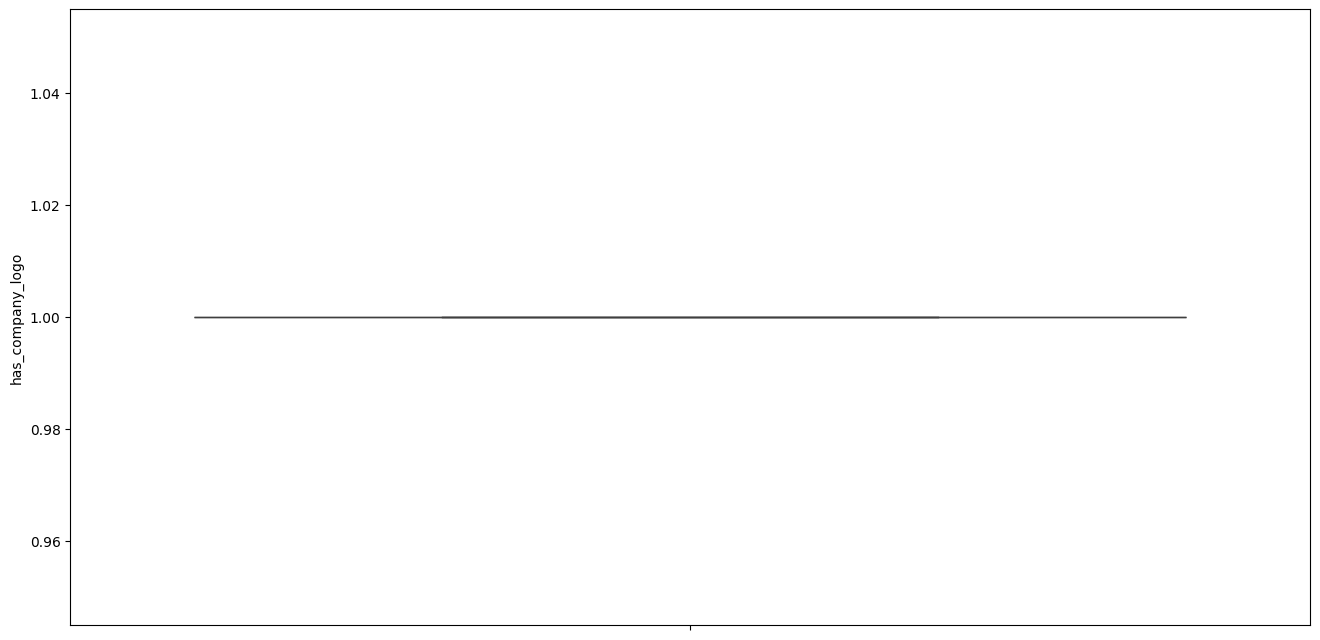

In [ ]:
plt.figure(figsize=[16,8])
sns.boxplot(data = df_url['has_company_logo'])
plt.show()

In [ ]:
df_url['telecommuting'] = df_url['telecommuting'].where(df_url['telecommuting'] < out_threshold_1)
df_url['telecommuting']

0       0.0
1       0.0
2       0.0
3       NaN
4       0.0
       ... 
1399    0.0
1400    0.0
1401    0.0
1402    NaN
1403    0.0
Name: telecommuting, Length: 1404, dtype: float64

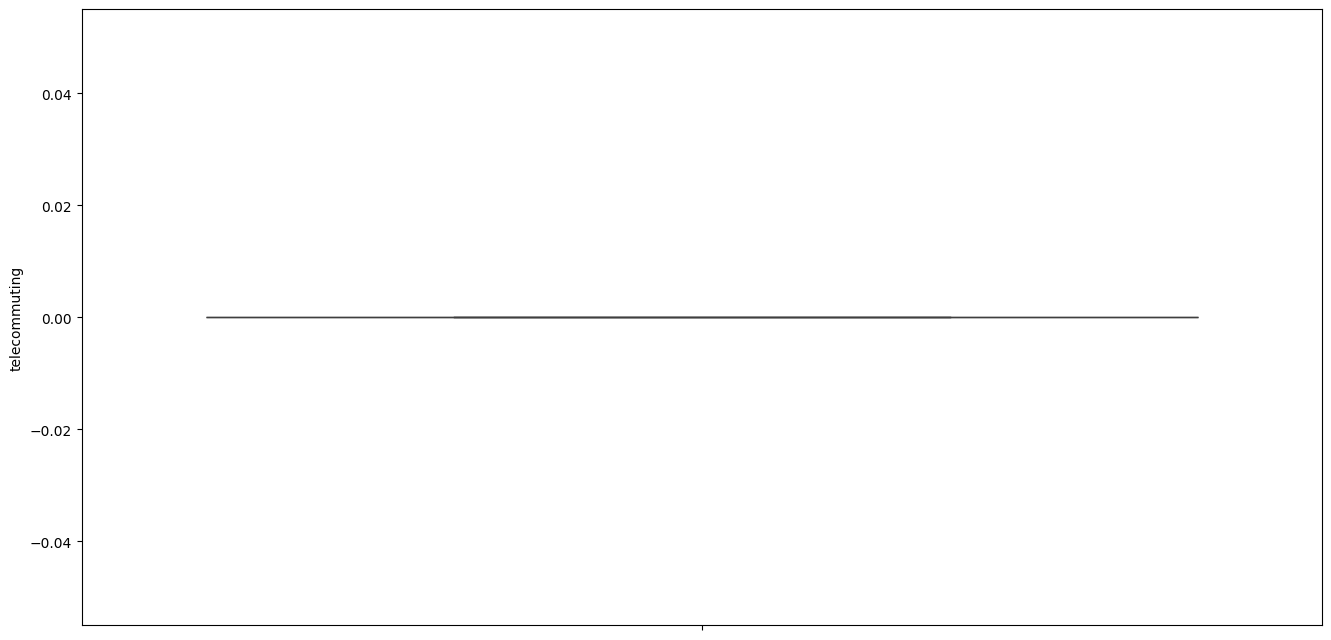

In [ ]:
plt.figure(figsize=[16,8])
sns.boxplot(data = df_url['telecommuting'])
plt.show()

In [ ]:
#JE - dropping job_id since it won't help our pedictions
df_url = df_url.drop(columns=['job_id'])
df_url

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0.0,1.0,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
1,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0.0,1.0,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
2,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0.0,1.0,0,Full-time,Executive,Unspecified,Internet,Sales,0
3,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,NaN,1.0,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0
4,Senior Business Development Manager,"GB, , Manchester",Sales and Business Development,70000-90000,MarketInvoice is one of the most high-profile ...,BACKGROUNDA senior sales and account managemen...,5-10 years sales experience in B2B solution sa...,Based in our Manchester officeCompetitive basi...,0.0,1.0,0,Full-time,Mid-Senior level,Bachelor's Degree,Financial Services,Sales,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,Health + Safety Professional,"US, CA, Bakersfield",HSE (Health Safety Environmental),80000-120000,...,Health &amp; Safety Professional | Bakersfield...,Duties and Responsibilities:Provides safety po...,What is offered:Competitive compensation packa...,0.0,1.0,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Other,1
1400,Market Operations Manager,"US, TX, AUSTIN",HEADQUATERS,65000-85000,The Accion story began more than 100 years ag...,"ExemptSHIFT WORKEDMonday-Sundays, Days, Nights...",OTHER REQUIREMENTS (LICENSES/CERTIFICATIONS)Pr...,ALL BENEFITS,0.0,1.0,1,Full-time,Mid-Senior level,Some College Coursework Completed,Management Consulting,Finance,1
1401,Health + Environmental Professional,"US, CA, Bakersfield",Oil & Energy,60000-90000,Macpherson Oil and Refined Resources have part...,Qualified candidates are encouraged to apply d...,"QualificationsMinimum Education, Knowledge &am...",What is offered:Competitive compensation packa...,0.0,1.0,1,Full-time,Entry level,Bachelor's Degree,Oil & Energy,Other,1
1402,Customer Service Representative,"US, CA, Los Angeles",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",NaN,1.0,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1


In [ ]:
#JE - so now outliers have been removed, dataset has been balanced

Data Preprocessing

In [ ]:
#JE - Defining target, predictor and numerical and categorical columns
TARGET = "fraudulent"
columns_predictors = [col for col in df_url.columns if col not in [TARGET]]
columns_categorical = ['title', 'location','company_profile', 'requirements','employment_type','required_experience', 'required_education', 'industry', 'function','salary_range']
columns_numerical = ['telecommuting','has_company_logo','has_questions']
#JE - there are text heavy columns in the categorical set that we could remove and put inton a different category(maybe columns_text) once we figure out how we want to deal with narrative columns
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: fraudulent
columns_predictors: ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
columns_categorical: ['title', 'location', 'company_profile', 'requirements', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'salary_range']
columns_numerical: ['telecommuting', 'has_company_logo', 'has_questions']


In [ ]:
X_je = df_url[columns_predictors]
y_je = df_url[TARGET]
display(X_je)
display(y_je)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0.0,True,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management
1,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0.0,True,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales
2,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0.0,True,0,Full-time,Executive,Unspecified,Internet,Sales
3,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,NaN,True,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing
4,Senior Business Development Manager,"GB, , Manchester",Sales and Business Development,70000-90000,MarketInvoice is one of the most high-profile ...,BACKGROUNDA senior sales and account managemen...,5-10 years sales experience in B2B solution sa...,Based in our Manchester officeCompetitive basi...,0.0,True,0,Full-time,Mid-Senior level,Bachelor's Degree,Financial Services,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,Collection Representative II,"US, TX, DALLAS",COLLECTION DEPT,30000-45000,The Accion story began more than 100 years ag...,The individual occupying this position must be...,Maintain attention and concentration for exten...,FULL- TIME BENEFITS,0.0,True,1,Full-time,Entry level,High School or equivalent,Financial Services,Customer Service
1400,CUSTOMER OPERATION MANAGER,"US, TX, AUSTIN",CALLCENTER,45000-70000,The Accion story began more than 100 years ag...,Customer Care Operations Manager is responsib...,High school diploma Shift flexibility - able ...,"ACCION offers a competitive, comprehensive ben...",0.0,True,1,Full-time,Associate,High School or equivalent,Management Consulting,Customer Service
1401,Sales Professional- Mid Market,"US, MD, Baltimore",Sales and Research,21600-31200,Making Mobile Device Management Clear is Clear...,- Maintain a high level of Clearmark solution ...,Job Requirements High School Diploma or GEDPas...,401kHealth InsurancePaid Time OffVacation Time...,0.0,True,0,Part-time,Entry level,High School or equivalent,Computer & Network Security,Sales
1402,Customer Service Representative,"US, FL, Jacksonville",customer service,30000-40000,"Since 2005, American Secured Benefits, a leadi...",Benefits company looking to hire several Custo...,High School Diploma or EquivalentBasic Compute...,Weekly PayPaid Holidays,NaN,True,0,Full-time,Entry level,High School or equivalent,Insurance,Customer Service


0       0
1       0
2       0
3       0
4       0
       ..
1399    1
1400    1
1401    1
1402    1
1403    1
Name: fraudulent, Length: 1404, dtype: int64

In [ ]:
#JE and BQ met and decision made to take the text heavy columns out of the RF and KNN modelling